# Building fluids models

To use `bluebonnet.fluids` in a project:

In [1]:
import bluebonnet as bb
from bluebonnet.fluids.fluid import Fluid
from bluebonnet.fluids.gas import (
    make_nonhydrocarbon_properties,
    pseudocritical_point_Sutton,
)

import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

## Calculate formation volume factors

With the `Fluid` class, we estimate the reservoir fluid's properties. That starts with [formation volume factor](https://petrowiki.spe.org/Gas_formation_volume_factor_and_density) and density. The pseudocritical point depends on the specific gravity and proportions of nitrogen, hydrogen sulfide, and CO_2_ present. Then, given a reservoir pressure and temperature, voila! b-factor!

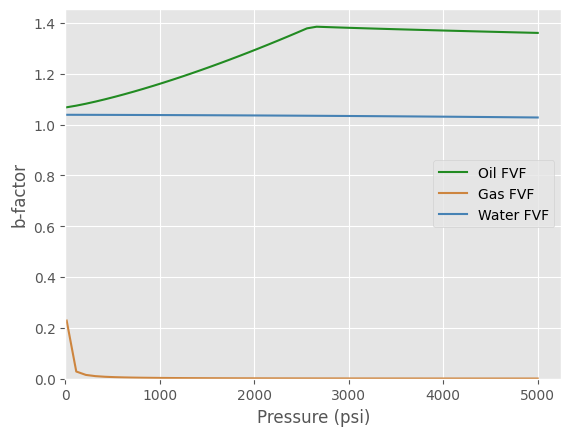

In [2]:
fluid = Fluid(
    200, 35, 0.8, 650
)  # 200 degrees F, 35 degrees API, specific gas gravity: 0.8, 650 scf/bbl initial reservoir gor
non_hydrocarbon_properties = make_nonhydrocarbon_properties(
    0.05, 0.01, 0.04
)  # nitrogen, hydrogen_sulfide, co2
pseudocritical_point = pseudocritical_point_Sutton(
    0.8, non_hydrocarbon_properties, "wet gas"
)  # gas gravity
pressure = np.linspace(14.5, 5_000)
Bo = fluid.oil_FVF(pressure)
Bg = fluid.gas_FVF(pressure, *pseudocritical_point)
Bw = fluid.water_FVF(pressure)

fig, ax = plt.subplots()
ax.plot(pressure, Bo, label="Oil FVF", color="forestgreen")
ax.plot(pressure, Bg, label="Gas FVF", color="peru")
ax.plot(pressure, Bw, label="Water FVF", color="steelblue")
ax.legend(loc="center right")
ax.set(xlabel="Pressure (psi)", ylabel="b-factor", xlim=(0, None), ylim=(0, None));

## Calculate viscosity

Viscosity and compressibility are the key pressure-varying diffusivity properties. Once again, these are available via the `Fluid` class.

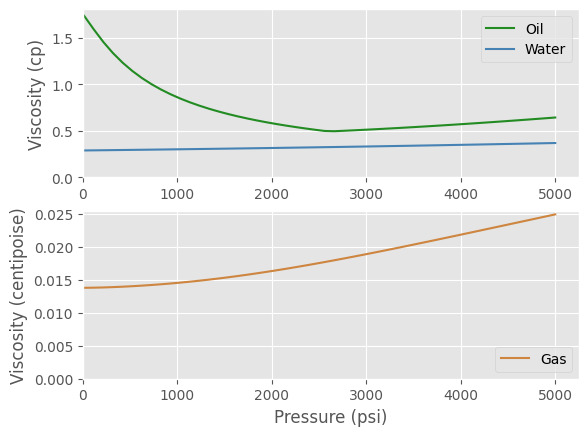

In [3]:
fluid = Fluid(
    200, 35, 0.8, 650
)  # 200 degrees F, 35 degrees API, specific gas gravity: 0.8, 650 scf/bbl initial reservoir gor
non_hydrocarbon_properties = make_nonhydrocarbon_properties(
    0.05, 0.01, 0.04
)  # nitrogen, hydrogen_sulfide, co2
pseudocritical_point = pseudocritical_point_Sutton(
    0.8, non_hydrocarbon_properties, "wet gas"
)  # gas gravity
pressure = np.linspace(14.5, 5_000)
mu_o = fluid.oil_viscosity(pressure)
mu_g = fluid.gas_viscosity(pressure, *pseudocritical_point)
mu_w = fluid.water_viscosity(pressure)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(pressure, mu_o, label="Oil", color="forestgreen")
ax1.plot(pressure, mu_w, label="Water", color="steelblue")
ax2.plot(pressure, mu_g, label="Gas", color="peru")
ax1.legend(loc="upper right")
ax1.set(ylabel="Viscosity (cp)", xlim=(0, None), ylim=(0, None))
ax2.legend(loc="lower right")
ax2.set(
    xlabel="Pressure (psi)",
    ylabel="Viscosity (centipoise)",
    xlim=(0, None),
    ylim=(0, None),
);

## Calculate compressibility

Compressibility is the last pressure-dependent factor important to single-phase flow.

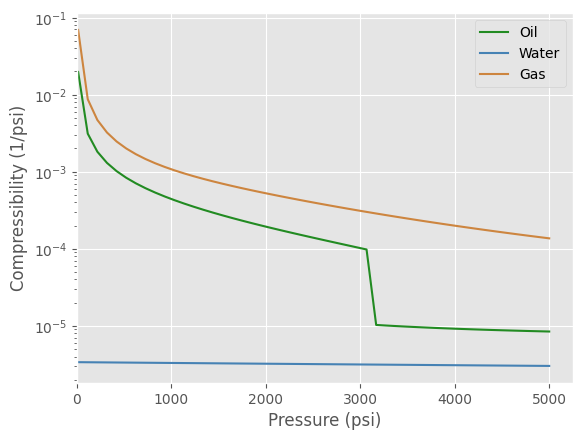

In [4]:
from bluebonnet.fluids.gas import compressibility_DAK
from bluebonnet.fluids.oil import oil_compressibility_Standing
from bluebonnet.fluids.water import compressibility_water_McCain

c_g = [compressibility_DAK(200, p, *pseudocritical_point) for p in pressure]
c_o = [
    oil_compressibility_Standing(200, p, 35, 0.8, 800, *pseudocritical_point)
    for p in pressure
]
c_w = compressibility_water_McCain(200, pressure, 0.0)

fig, ax = plt.subplots()
ax.plot(pressure, c_o, label="Oil", color="forestgreen")
ax.plot(pressure, c_w, label="Water", color="steelblue")
ax.plot(pressure, c_g, label="Gas", color="peru")

ax.legend(loc="upper right")
ax.set(
    xlabel="Pressure (psi)",
    ylabel="Compressibility (1/psi)",
    xlim=(0, None),
    yscale="log",
);